## **First step: Exploratory Data Analysis – EDA :**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/ShAI Projects/Clustring project/CC GENERAL.csv")

## **Basic Data Exploration**

**1- head of the dataset**

In [ ]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**2-The shape of the dataset**

In [ ]:
data.shape

(8950, 18)

**3-Info of the dataset & Know the datatypes**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

***Discussion:***
***
There is one catigorical columns , we have ti deal with it 

## **Descover Missing value**

**1-Check amount of missing values**

In [ ]:
data.isnull().sum() 

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

***Discussion:***
***
I have two columns have missing values 

## **Duplicate values**

In [ ]:
data.duplicated().sum()

0


**Discussion:**
***
In this dataset there are no duplicated values ,so we can ignore the processing steps of duplicated data

## **Analysis Data and Visulization**

**1.Histograms for numerical attributes**

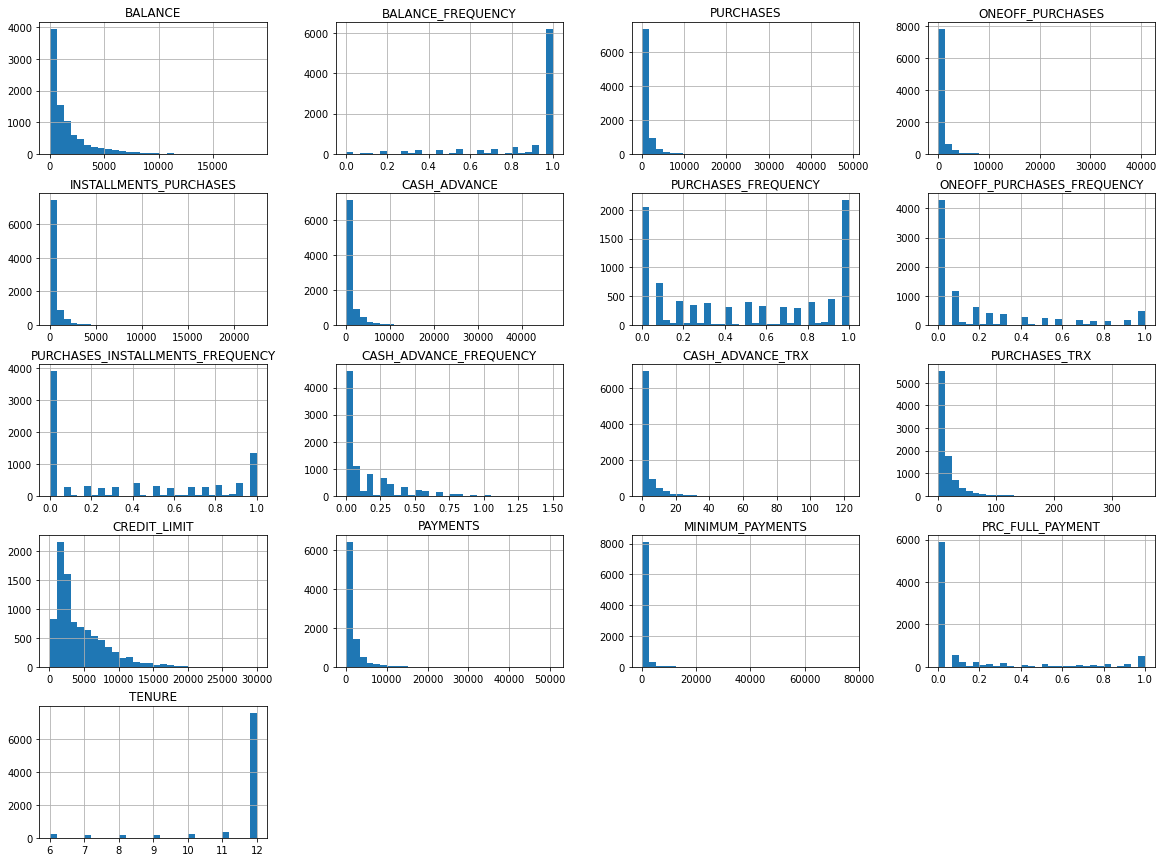

In [ ]:
#Plot histogram for all for each numerical attribute 
data.hist(bins=30, figsize=(20,15))
plt.show()

**look for correlations among the features**

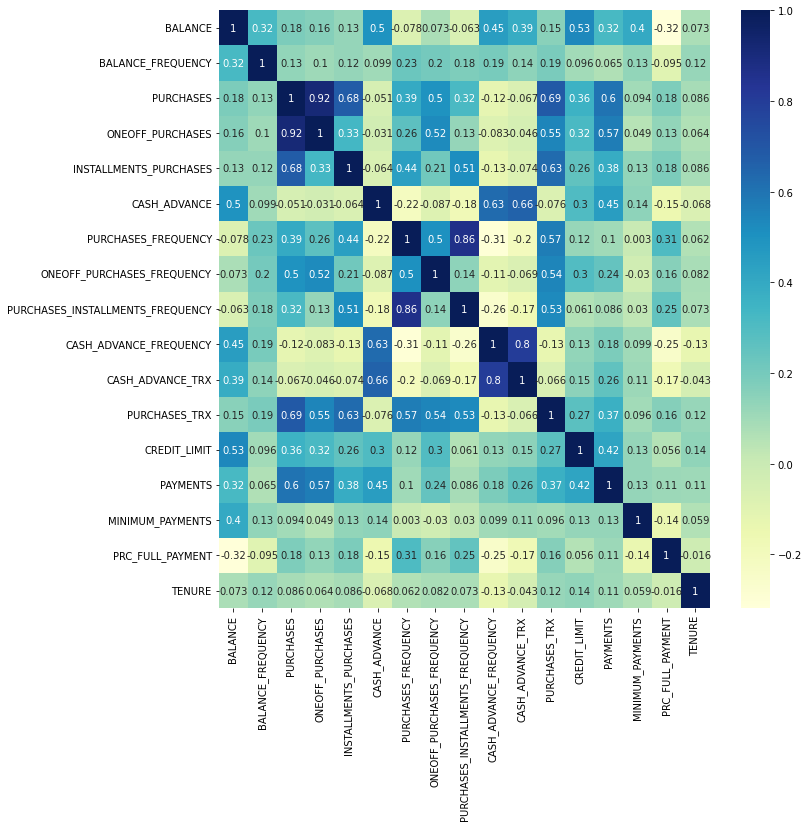

In [ ]:

plt.figure(figsize=(11, 11))
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [ ]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

**Discussion:**
***
we can notice that:

- "PURCHASES" correlated with "ONEOFF_PURCHASES" with 0.92
- "PURCHASES" correlated with "INSTALLMENTS_PURCHASES" with 0.68
- "PURCHASES" correlated with "PURCHASES_TRX" with 0.69

- "PURCHASES_FREQUENCY" correlated with "PURCHASES_INSTALLMENTS_FREQUENCY" with 0.86

There are strong correlations between PURCHASES & many other features so may we can delete it .

**4-Discover all features**

In [ ]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df_nunique = pd.DataFrame([[col , data[col].nunique(),data[col].dtypes] for col in data.columns],columns=['col','nunique','type'])
df_nunique

,col,nunique,type
0,CUST_ID,8950,object
1,BALANCE,8871,float64
2,BALANCE_FREQUENCY,43,float64
3,PURCHASES,6203,float64
4,ONEOFF_PURCHASES,4014,float64
5,INSTALLMENTS_PURCHASES,4452,float64
6,CASH_ADVANCE,4323,float64
7,PURCHASES_FREQUENCY,47,float64
8,ONEOFF_PURCHASES_FREQUENCY,47,float64
9,PURCHASES_INSTALLMENTS_FREQUENCY,47,float64


**5-Descover distrebution:**

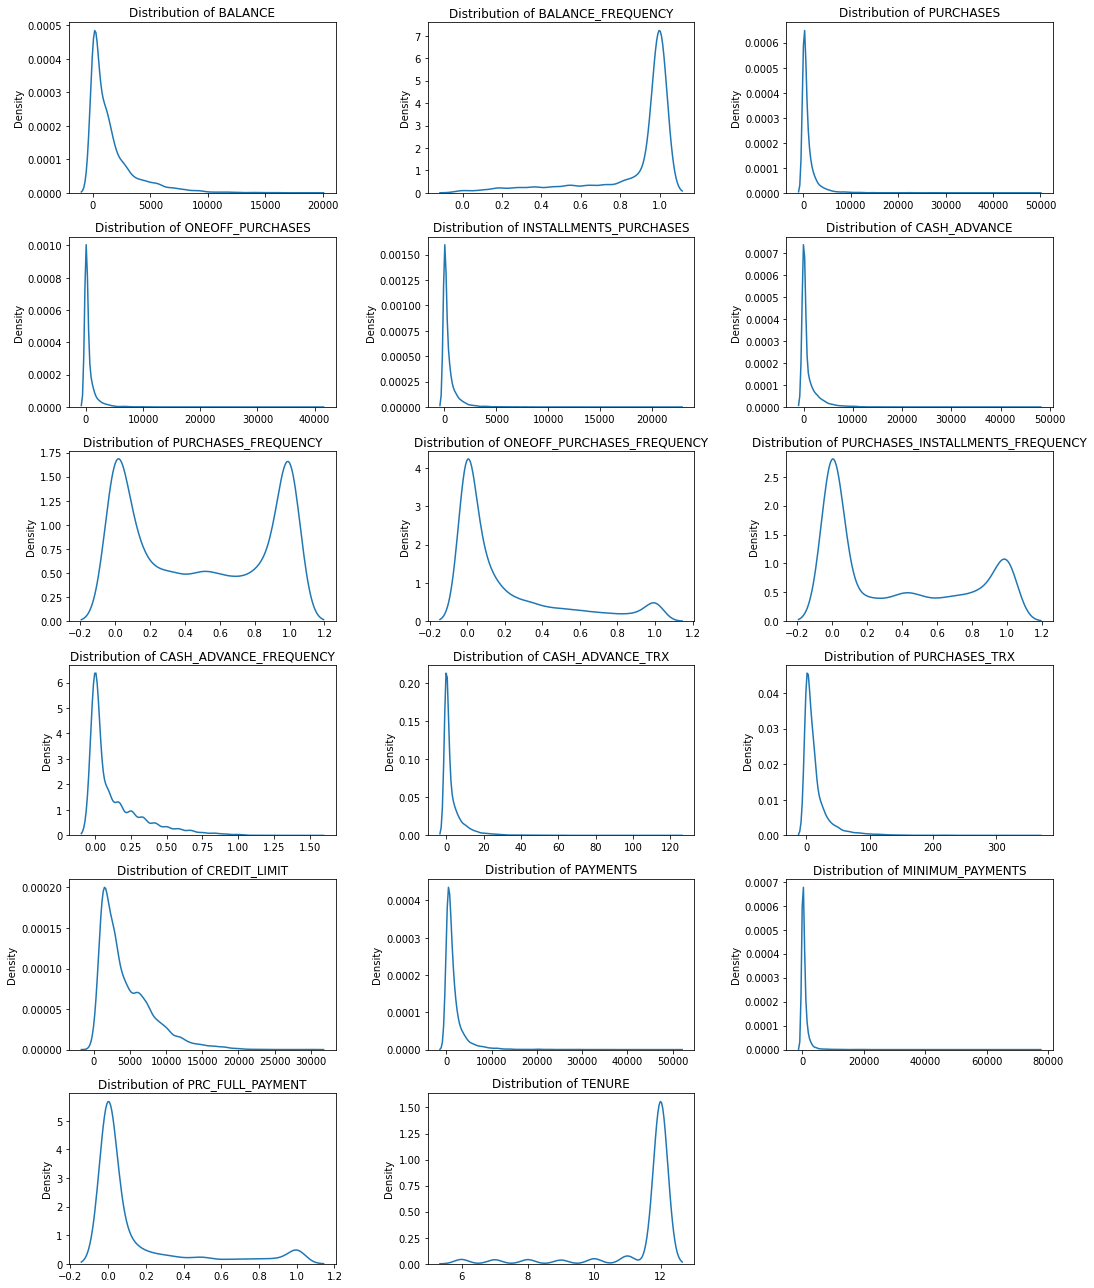

In [ ]:
df_cont = data.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

fig = plt.figure(figsize=(15, 18)) # sets the size of the 4 plot with width as 15 and height as 18
for i,columns in enumerate(df_cont.columns, 1): 
  ax = plt.subplot(6,3,i) # creates 3 subplots in one single row
  sns.kdeplot(x=df_cont[columns]) # creates kde plots for each feature in df_cont dataset
  ax.set_xlabel(None) # removes the labels on x-axis
  ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
  plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() # displays the plots

In [ ]:
df_cont = data.select_dtypes([int,float]) # store all integer or float columns in df_cont variable
for i in df_cont.columns:
  print(f'Skewness in {i} =',df_cont[i].skew())

Skewness in BALANCE = 2.393386042571806
Skewness in BALANCE_FREQUENCY = -2.0232655185149078
Skewness in PURCHASES = 8.144269064554651
Skewness in ONEOFF_PURCHASES = 10.045082884700278
Skewness in INSTALLMENTS_PURCHASES = 7.299119908745641
Skewness in CASH_ADVANCE = 5.166609074074723
Skewness in PURCHASES_FREQUENCY = 0.06016423585803591
Skewness in ONEOFF_PURCHASES_FREQUENCY = 1.5356127835248519
Skewness in PURCHASES_INSTALLMENTS_FREQUENCY = 0.5092011649999882
Skewness in CASH_ADVANCE_FREQUENCY = 1.828686266477852
Skewness in CASH_ADVANCE_TRX = 5.721298203192298
Skewness in PURCHASES_TRX = 4.630655265932403
Skewness in CREDIT_LIMIT = 1.5224640052886198
Skewness in PAYMENTS = 5.907619794397562
Skewness in MINIMUM_PAYMENTS = 13.622796994677456
Skewness in PRC_FULL_PAYMENT = 1.942819940971858
Skewness in TENURE = -2.9430172876199134


<ipython-input-16-e273d8612fc3>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_skew = data.skew()


<AxesSubplot:>

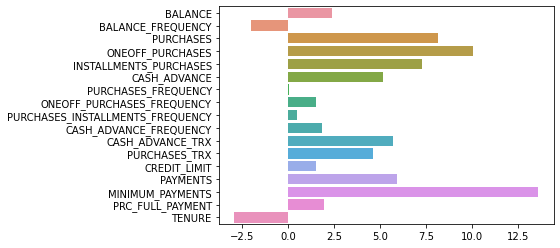

In [ ]:
X_skew = data.skew()
sns.barplot(x=X_skew.values, y=X_skew.index)

**6-Descover Outliers:**

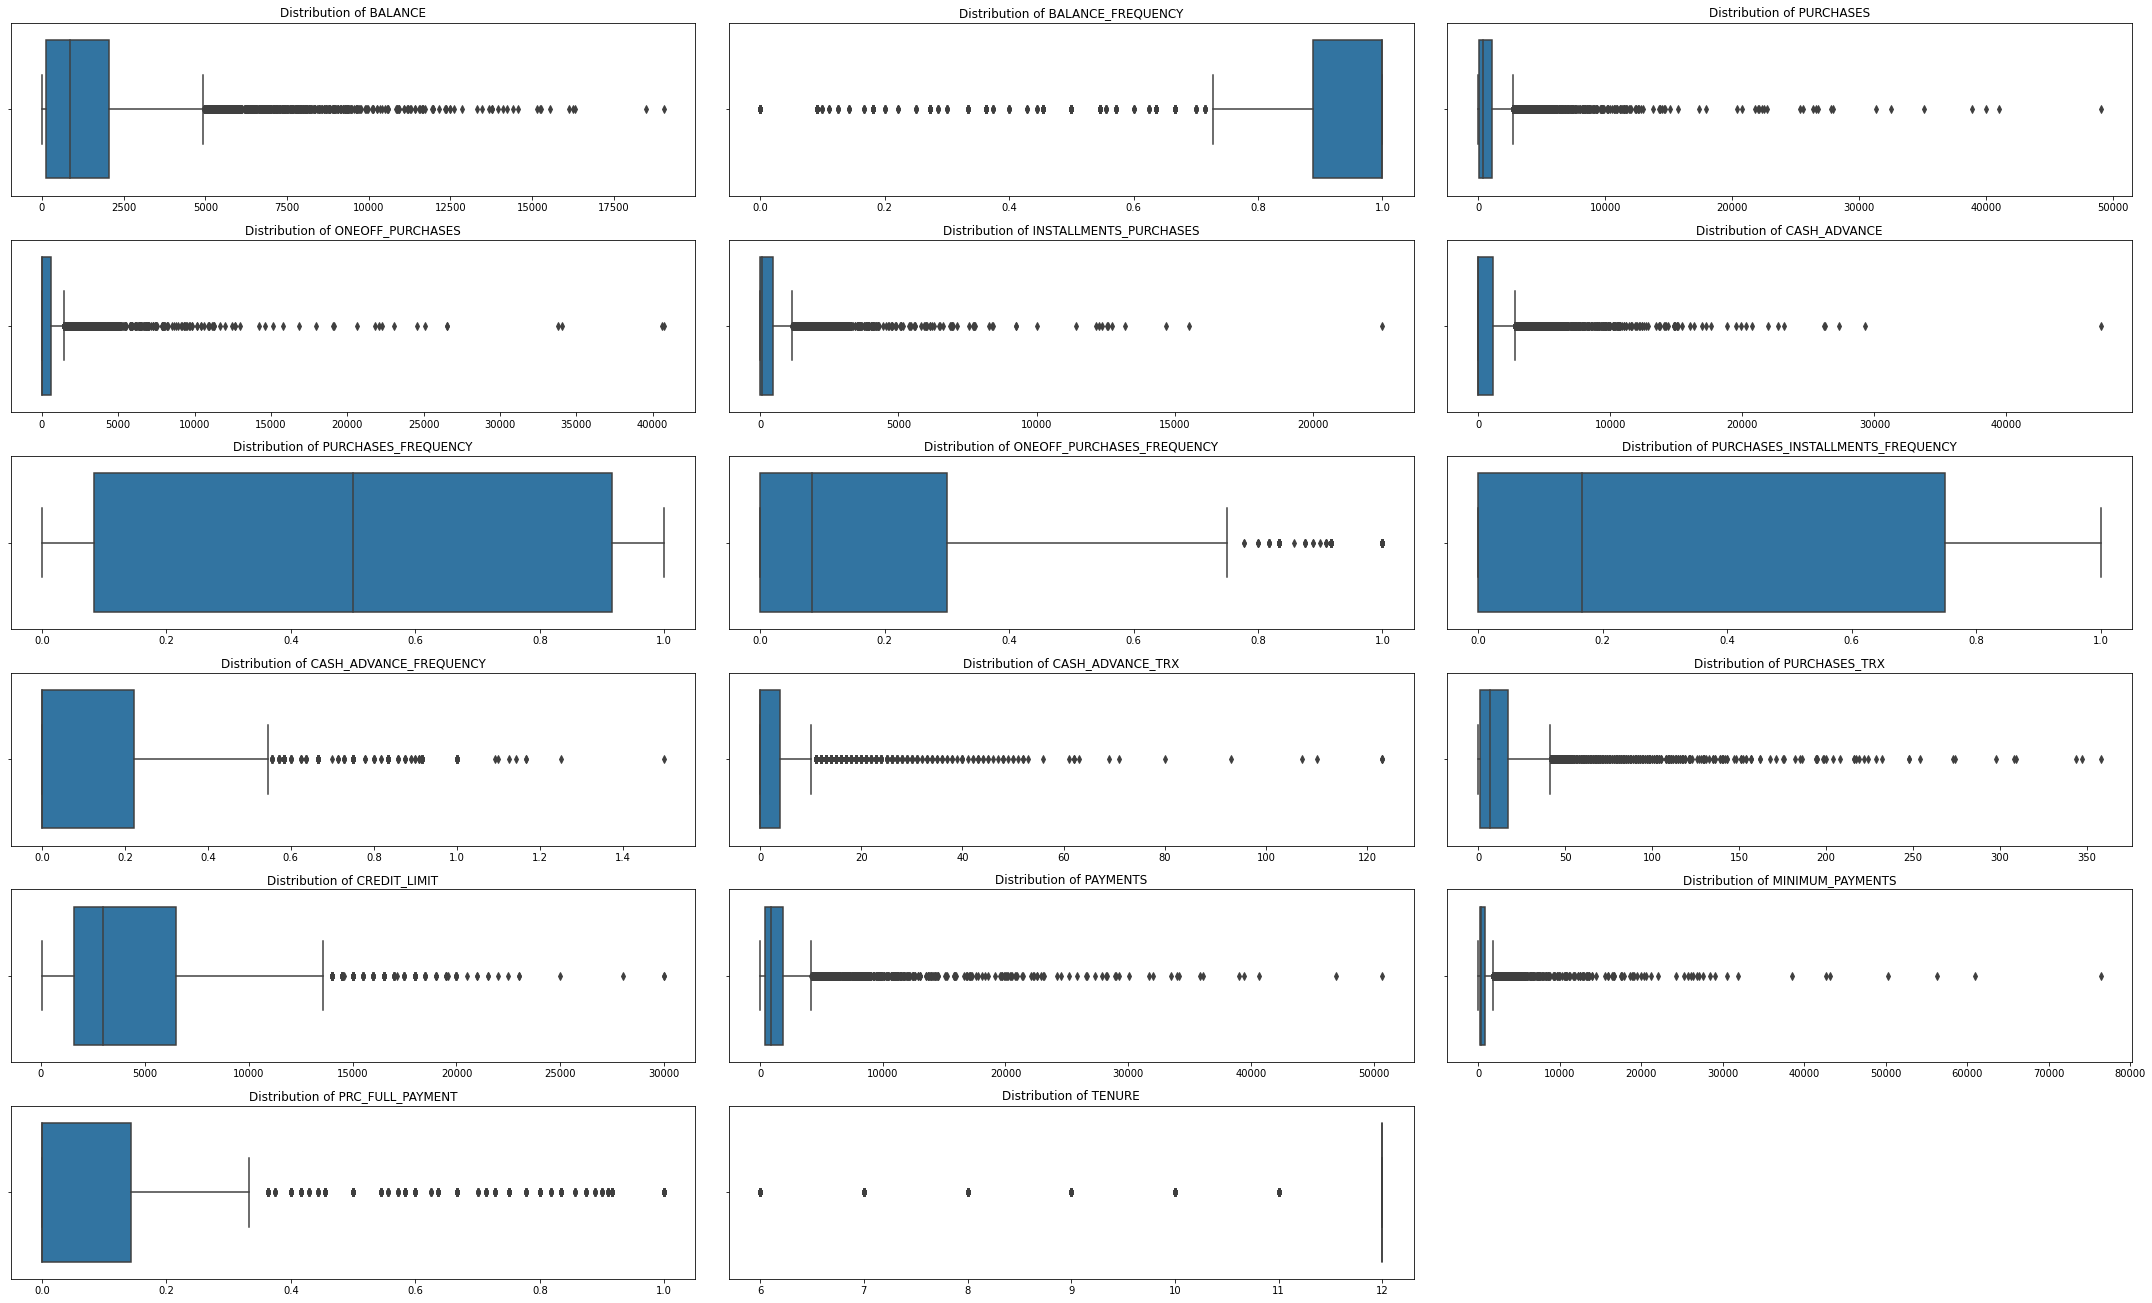

In [ ]:
df_cont = data.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

fig = plt.figure(figsize=(30, 30)) # sets the size of the 4 plot with width as 10 and height as 10
for i,columns in enumerate(df_cont.columns, 1): 
  ax = plt.subplot(10,3,i) # creates 3 subplots in one single row
  sns.boxplot(data = df_cont, x=df_cont[columns]) # creates box plots for each feature in df_cont dataset
  ax.set_xlabel(None) # removes the labels on x-axis
  ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
  plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() # displays the plots

# **second step: Prepare the Data for Machine Learning Algorithms**


In [ ]:
data1=data

## A- Data Cleaning

missing values

In [ ]:
#Popularity
Median_min_pay=data1["MINIMUM_PAYMENTS"].median()
data1=data1.fillna({"MINIMUM_PAYMENTS":Median_min_pay})

In [ ]:
#Popularity
Median_crd_L=data1["CREDIT_LIMIT"].mean()
data1=data1.fillna({"CREDIT_LIMIT":Median_crd_L})

In [ ]:
data1.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## B-Handling Text and Categorical Attributes

In [ ]:
data1=data1.drop(['CUST_ID'],axis=1)
data1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## C-Remove outliers

In [ ]:
data1.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [ ]:
data1.columns[-1]

'TENURE'

In [ ]:
def handle_outlier(col):
  tenth_percentile = np.percentile(data1[col], 10)
  ninetieth_percentile = np.percentile(data1[col], 90)
  mean=data1[col].mean()
  data1[col].mask(data1[col] > ninetieth_percentile, mean, inplace=True)
  data1[col].mask(data1[col] < tenth_percentile, mean, inplace=True)
  return 


In [ ]:
for i in data1.columns:
  if(i != data1.columns[-1]):
    handle_outlier(i)

In [ ]:
data1.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

D- remove Swek

In [ ]:
low_power=["PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","CASH_ADVANCE_TRX","PAYMENTS","MINIMUM_PAYMENTS",'PRC_FULL_PAYMENT']

In [ ]:
for col in low_power:
  data1[col]=np.log(1 + data1[col])

<AxesSubplot:>

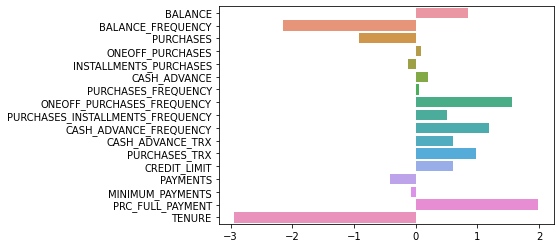

In [ ]:
X_skew = data1.skew()
sns.barplot(x=X_skew.values, y=X_skew.index)

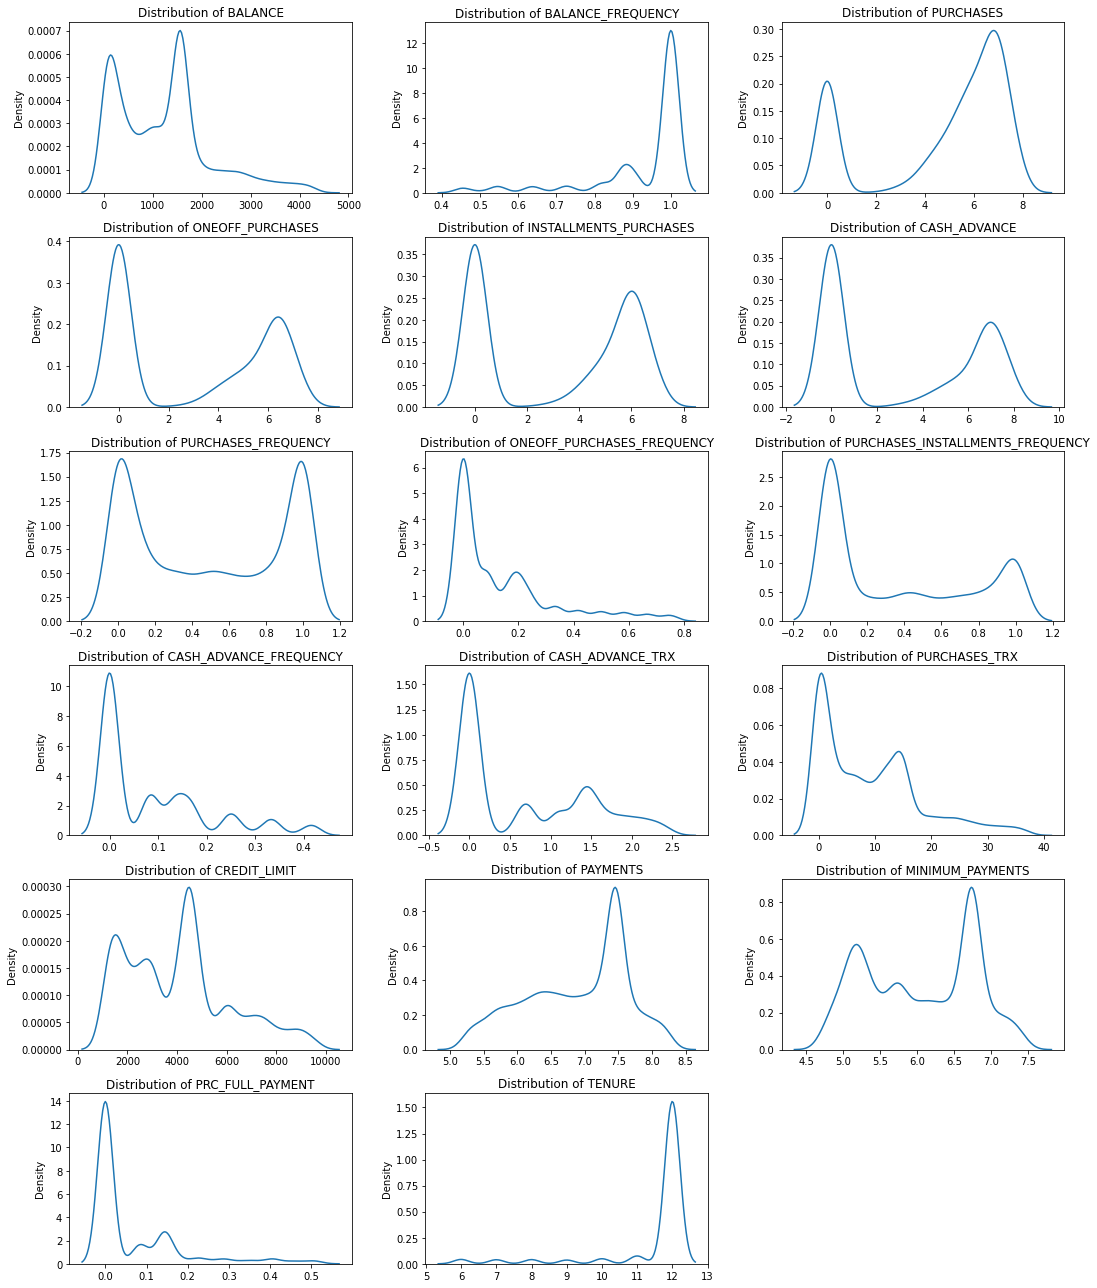

In [ ]:
df_cont = data1.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

fig = plt.figure(figsize=(15, 18)) # sets the size of the 4 plot with width as 15 and height as 18
for i,columns in enumerate(df_cont.columns, 1): 
  ax = plt.subplot(6,3,i) # creates 3 subplots in one single row
  sns.kdeplot(x=df_cont[columns]) # creates kde plots for each feature in df_cont dataset
  ax.set_xlabel(None) # removes the labels on x-axis
  ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
  plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() # displays the plots



In [ ]:
data1.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## C- Standerazation

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# CODE HERE
num_pipeline = Pipeline([('std_scaler', StandardScaler())])

card_num_tr = num_pipeline.fit_transform(data1)
card_num_tr

array([[-1.21449104, -0.85997368, -0.06538117, ..., -1.46942024,
        -0.57519423,  0.36067954],
       [ 2.05465167, -0.16694681, -1.7197379 , ...,  1.2440005 ,
         1.14939429,  0.36067954],
       [ 1.32326577,  0.52608006,  0.68902232, ...,  0.52931455,
        -0.57519423,  0.36067954],
       ...,
       [ 0.36092445, -0.74447302,  0.08344459, ...,  0.92622208,
         1.3425305 , -4.12276757],
       [ 0.36092445, -0.74447302, -1.7197379 , ...,  0.92622208,
         1.3425305 , -4.12276757],
       [-0.87139358, -2.01501847,  0.81432849, ...,  0.92622208,
        -0.57519423, -4.12276757]])

In [ ]:
card_prepared=card_num_tr

In [ ]:
card_prepared.shape

(8950, 17)

# **# Third step:Select and Train a Model**

### **1-K-means:**

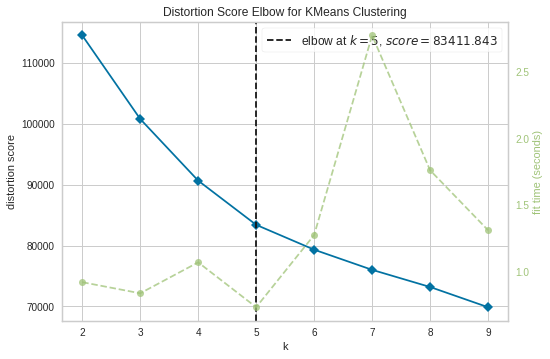

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

X=card_prepared
# Instantiate the clustering model and visualizer
model = KMeans(init = 'k-means++')
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure

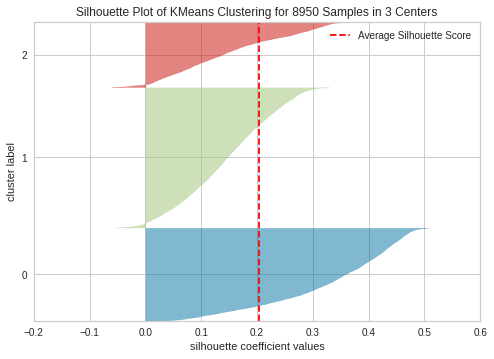

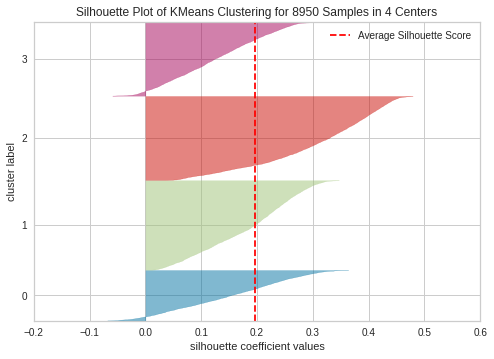

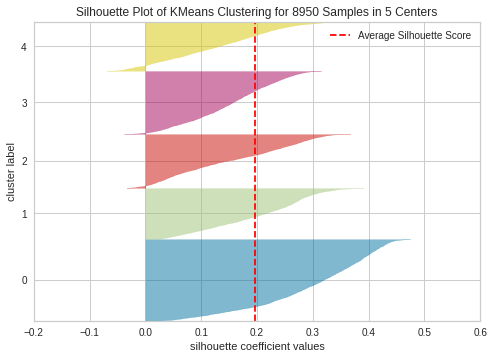

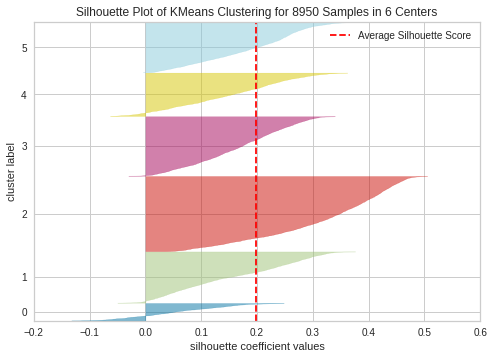

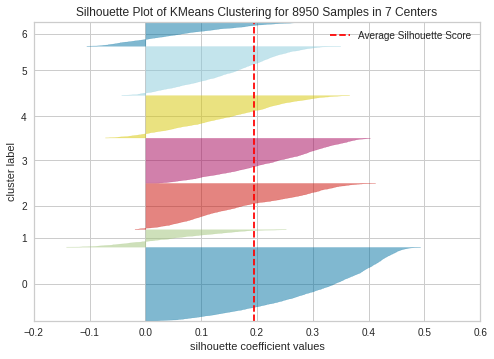

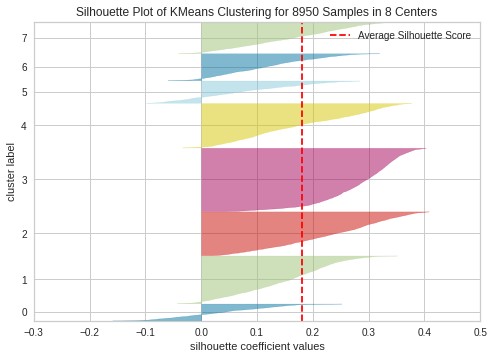

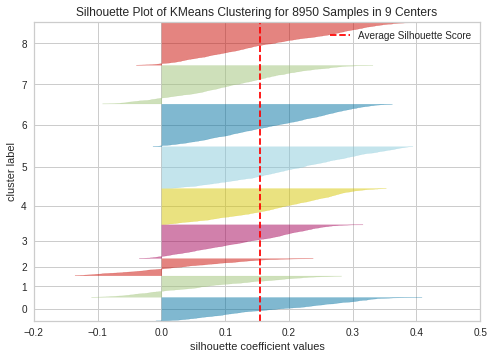

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer


# Specify the features to use for clustering

# Instantiate the clustering model and visualizer
for i in range (3,10):
  model = KMeans(i, random_state=42)
  visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

  visualizer.fit(X)        # Fit the data to the visualizer
  visualizer.poof()        # Finalize an

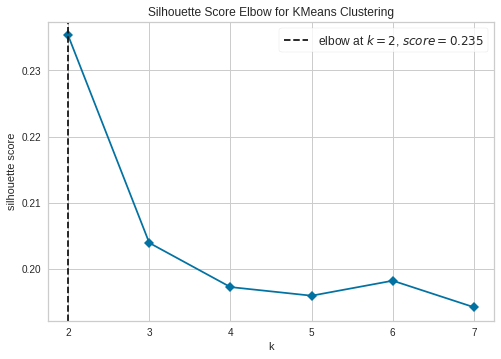

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
visualizer = KElbowVisualizer(model, k=(2,8), metric='silhouette', timings=False)

visualizer.fit(X)    
visualizer.poof()

score

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
kh_mins = KMeans(n_clusters=5).fit(card_prepared)
kh_mins_sil_score = silhouette_score(card_prepared, kh_mins.labels_)     
kh_mins_sil_score

0.19627328335004068

Plot

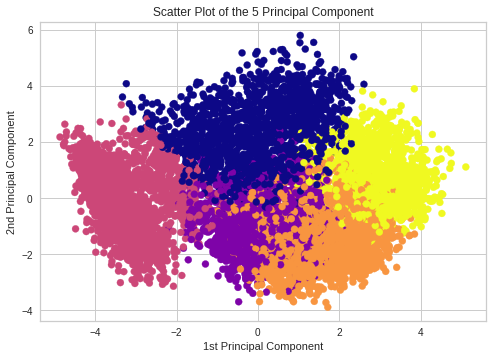

In [ ]:
from sklearn.decomposition import IncrementalPCA
pca = IncrementalPCA(n_components =5)
X_pca = pca.fit_transform(card_prepared)
hc = KMeans(n_clusters =5)
X=card_prepared
y_kmeans = hc.fit_predict(X)

# Scatter Plot of the 2 Principal Components with labels indicated by colors
plt.scatter(X_pca[:,0], X_pca[:,1], c = y_kmeans, cmap = 'plasma')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Scatter Plot of the 5 Principal Component')
plt.show()

### **3-AgglomerativeClustering**

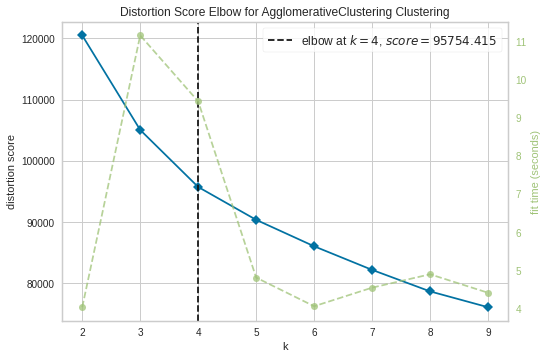

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = card_prepared
modle1 = AgglomerativeClustering().fit(X)
# Instantiate the clustering model and visualizer

visualizer = KElbowVisualizer(modle1, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()

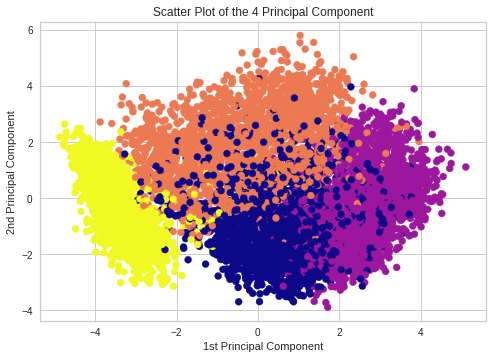

In [ ]:
from sklearn.decomposition import IncrementalPCA
pca = IncrementalPCA(n_components =4)
X_pca = pca.fit_transform(card_prepared)
hc = AgglomerativeClustering(n_clusters =4)
X=card_prepared
y_Agg = hc.fit_predict(X)

# Scatter Plot of the 2 Principal Components with labels indicated by colors
plt.scatter(X_pca[:,0], X_pca[:,1], c = y_Agg, cmap = 'plasma')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Scatter Plot of the 4 Principal Component')
plt.show()

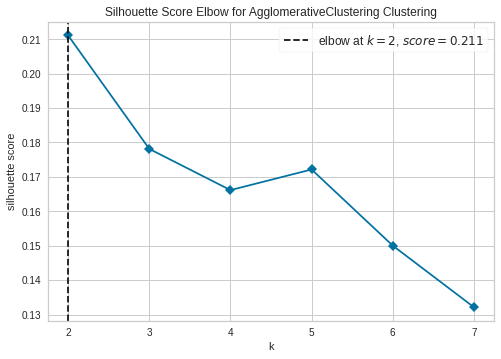

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
visualizer = KElbowVisualizer(modle1, k=(2,8), metric='silhouette', timings=False)

visualizer.fit(X)    
visualizer.poof()

### **3-NearestNeighbors**:

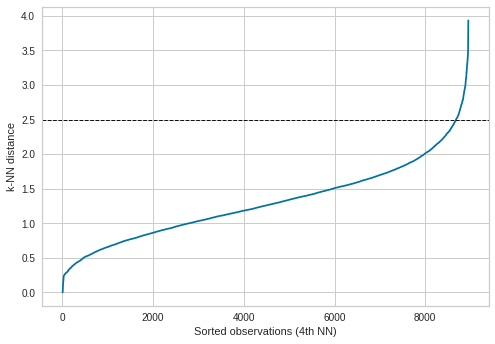

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors=4).fit(card_prepared)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(card_prepared)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)
k_dist = sort_neigh_dist[:, 3]
plt.plot(k_dist)
plt.axhline(y=2.5, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

## Plot the results:

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

In [ ]:
Xn = normalize(card_prepared)  

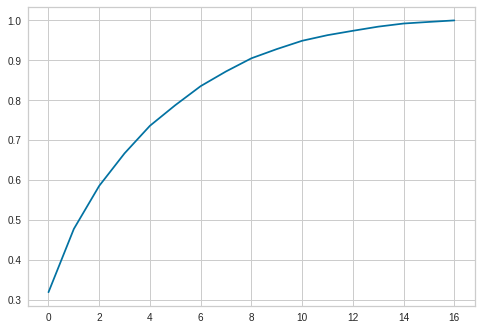

In [ ]:
pca_test = PCA().fit(Xn)
plt.plot(pca_test.explained_variance_ratio_.cumsum())

In [ ]:
modle1 = AgglomerativeClustering(n_clusters=4).fit(X)

In [ ]:
u=modle1.labels_

In [ ]:
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

Xn_2d = pca_2d.fit_transform(Xn)
Xn_3d = pca_3d.fit_transform(Xn)

normalize_Xs_because = PCA(n_components=2).fit_transform(card_prepared)

<AxesSubplot:>

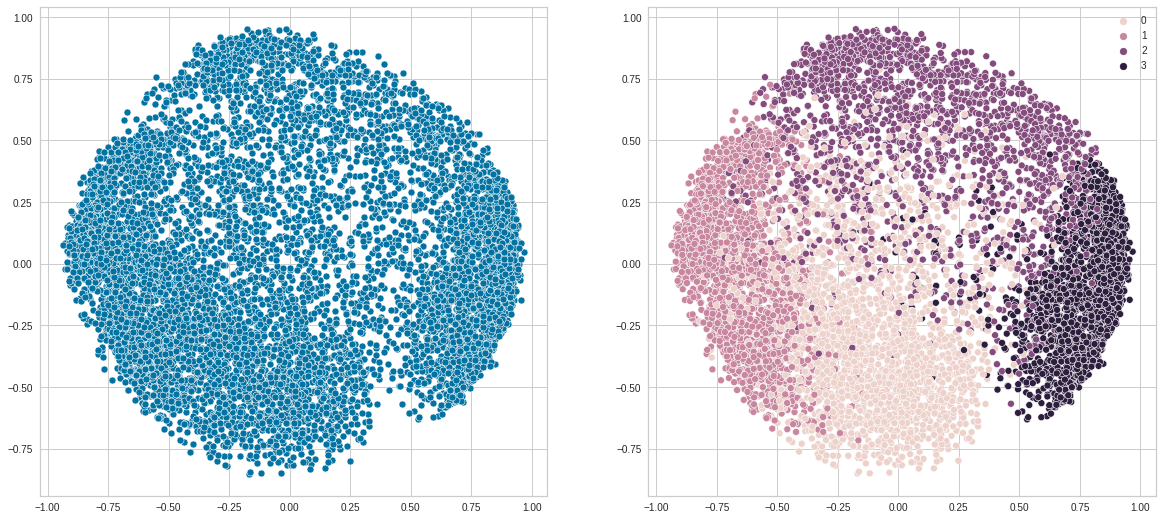

In [ ]:
plt.figure(figsize=(20, 9))
x_, y_ = Xn_2d.T

plt.subplot(1, 2, 1)
sns.scatterplot(x=x_, y=y_)

plt.subplot(1, 2, 2)
sns.scatterplot(x=x_, y=y_, hue=u)

In [ ]:
import plotly.express as px

x_, y_, z_ = Xn_3d.T
fig = px.scatter_3d(x=x_, y=y_, z=z_, color=u)
fig.show()